In [1]:
from diagnostics import *
%matplotlib inline

In [2]:
# get data
planet, iteration = 8, 4
self = loadpickle('Results/TOIsensitivity27vettv3_mult2_planet%.5d_iteration%.3d/Sensitivity_class'%(planet,iteration))

Stellar parameters:
Tmag     = 10.840
Ms       = 0.405
Rs       = 0.391
Teff     = 3506
sig_phot = 467.3 ppm

2 injected planets:
P  [days] = 0.855, 7.166
rp        = 0.70, 1.18
rp/Rs     = 0.01640, 0.02768
(rp/Rs)^2 = 268.885740, 766.311037 ppm
detected  = 0, 0

0 false positives:
P [days] = 


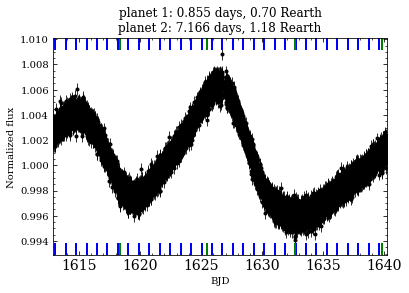

In [3]:
#
plot_raw_LC(self)

Stellar parameters:
Tmag     = 10.840
Ms       = 0.405
Rs       = 0.391
Teff     = 3506
sig_phot = 467.3 ppm

2 injected planets:
P  [days] = 0.855, 7.166
rp        = 0.70, 1.18
rp/Rs     = 0.01640, 0.02768
(rp/Rs)^2 = 268.885740, 766.311037 ppm
detected  = 0, 0

0 false positives:
P [days] = 


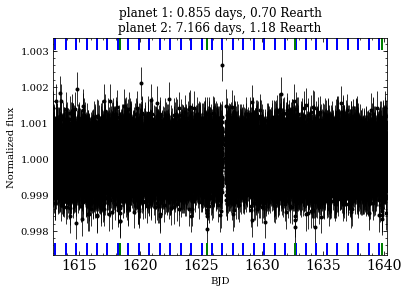

In [4]:
#
plot_corrected_LC(self)

Stellar parameters:
Tmag     = 10.840
Ms       = 0.405
Rs       = 0.391
Teff     = 3506
sig_phot = 467.3 ppm

2 injected planets:
P  [days] = 0.855, 7.166
rp        = 0.70, 1.18
rp/Rs     = 0.01640, 0.02768
(rp/Rs)^2 = 268.885740, 766.311037 ppm
detected  = 0, 0

0 false positives:
P [days] = 


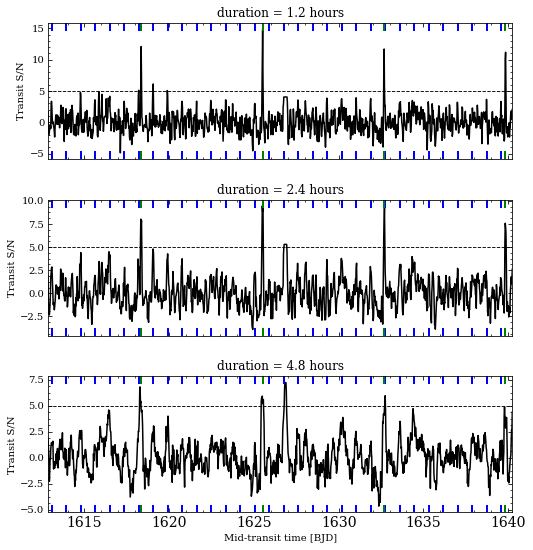

In [5]:
#
plot_transit_search(self, log=0)

In [6]:
#
report_failed_planet_candidates(self)

Period = 7.166 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 12.778 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 13.635 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 19.937 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 20.785 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False



In [7]:
#
check_confirm_transits(self, 2.3, 1.5, .5)

Confirming proposed transits...
0.0
0.2
0.4
0.6
0.8


(array([[7.16606278e+00, 1.62550796e+03, 7.49205484e-04, 5.97439512e-02],
        [1.27782474e+01, 1.63267496e+03, 5.52805936e-04, 6.33543093e-02],
        [1.36347830e+01, 1.63267377e+03, 6.14112807e-04, 5.39178142e-02],
        [1.99366651e+01, 1.63983798e+03, 6.81492032e-04, 6.32463928e-02],
        [2.07846384e+01, 1.63984038e+03, 6.23698379e-04, 6.83455584e-02]]),
 array([[7.16607520e+00, 1.62550800e+03, 7.56629032e-04, 5.93178880e-02]]),
 array([139729.7427451]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False,  True]))

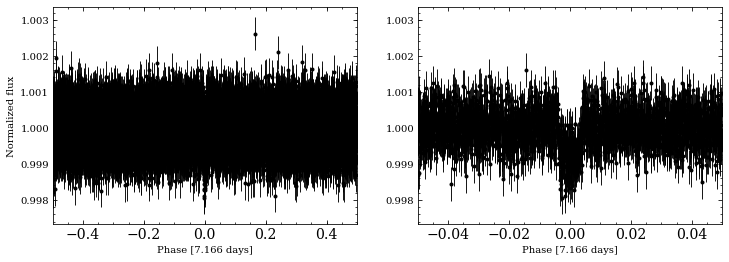

In [8]:
i = 0
plot_phased_LC(self, self.params_guess_priorto_confirm[i,0], self.params_guess_priorto_confirm[i,1])